In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df1 = pd.read_csv('diabetes.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df1.shape

(768, 9)

# STEP-1

In [33]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
df1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [36]:
d12 = df1['Outcome'].value_counts()
d12

0    500
1    268
Name: Outcome, dtype: int64

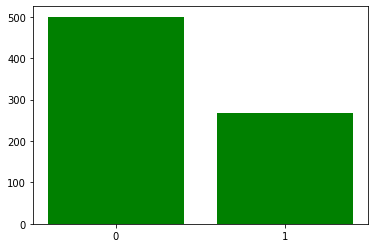

In [7]:
plt.bar(['0','1'],d1.values,color='green')
plt.show()

In [37]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:
df1['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [41]:
d22 = df1.groupby(['Pregnancies','Outcome'])['Pregnancies'].sum()
d22

Pregnancies  Outcome
0            0            0
             1            0
1            0          106
             1           29
2            0          168
             1           38
3            0          144
             1           81
4            0          180
             1           92
5            0          180
             1          105
6            0          204
             1           96
7            0          140
             1          175
8            0          128
             1          176
9            0           90
             1          162
10           0          140
             1          100
11           0           44
             1           77
12           0           60
             1           48
13           0           65
             1           65
14           1           28
15           1           15
17           1           17
Name: Pregnancies, dtype: int64

In [42]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [43]:
df1.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

# ANN MODEL

In [44]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [45]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [46]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [47]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# STEP-2

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [19]:
y_train[:5]

537    0
31     1
92     0
494    0
53     1
Name: Outcome, dtype: int64

# STEP-3

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop

In [48]:
m1 = Sequential()                                 
m1.add(Dense(40, activation='relu',input_dim=8))               
m1.add(Dense(20, activation='relu'))
m1.add(Dense(10, activation='relu'))
m1.add(Dense(1,activation='sigmoid'))             

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# STEP-4

In [49]:
R1 = m1.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
17/17 [==============================] - 1s 19ms/step - loss: 2.1133 - accuracy: 0.5363 - val_loss: 1.7678 - val_accuracy: 0.5628
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 1.1233 - accuracy: 0.5940 - val_loss: 1.0769 - val_accuracy: 0.7186
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 0.9532 - accuracy: 0.6406 - val_loss: 0.9525 - val_accuracy: 0.6840
Epoch 4/50
17/17 [==============================] - 0s 5ms/step - loss: 0.8135 - accuracy: 0.6313 - val_loss: 0.7420 - val_accuracy: 0.6753
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.6629 - val_loss: 0.7153 - val_accuracy: 0.6797
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 0.6516 - accuracy: 0.6983 - val_loss: 0.6774 - val_accuracy: 0.7316
Epoch 7/50
17/17 [==============================] - 0s 7ms/step - loss: 0.6456 - accuracy: 0.6890 - val_loss: 0.6171 - val_accuracy: 0.7532
Epoch 8/50
17/17 [=

In [50]:
r1 = pd.DataFrame(R1.history)
r1['Epochs'] = R1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
45,0.545195,0.724395,0.589186,0.696970,45
46,0.509320,0.744879,0.671740,0.688312,46
47,0.553454,0.737430,0.697724,0.679654,47
48,0.548072,0.711359,0.619541,0.692641,48
49,0.516182,0.739292,0.612485,0.692641,49


# STEP-5

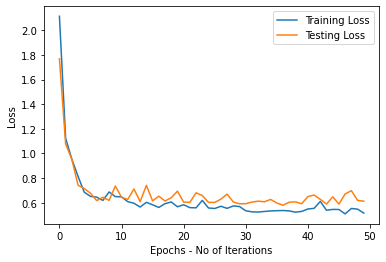

In [51]:
plt.plot(r1['Epochs'],r1['loss'],label='Training Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing Loss')
plt.xlabel('Epochs - No of Iterations')
plt.legend()
plt.ylabel('Loss')
plt.show()

# STEP-6

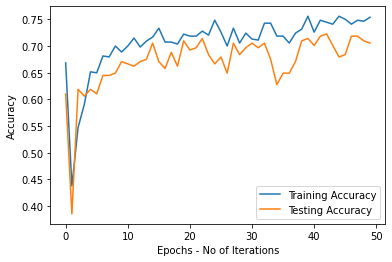

In [25]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training Accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing Accuracy')
plt.xlabel('Epochs - No of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# STEP-7

In [52]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[[0.27978948]
 [0.04306683]
 [0.43546906]
 [0.20266336]
 [0.6113745 ]
 [0.56467736]
 [0.11370692]
 [0.4789294 ]
 [0.2245382 ]
 [0.27358758]
 [0.406255  ]
 [0.09432614]
 [0.21016464]
 [0.14526245]
 [0.31484067]
 [0.16811496]
 [0.8536447 ]
 [0.37060297]
 [0.37457043]
 [0.45615995]
 [0.33638301]
 [0.21439844]
 [0.7370811 ]
 [0.16028747]
 [0.37915152]
 [0.11034656]
 [0.3525483 ]
 [0.30613452]
 [0.3431896 ]
 [0.32174677]
 [0.00656477]
 [0.24629983]
 [0.08605996]
 [0.43524647]
 [0.17887482]
 [0.8109578 ]
 [0.13251927]
 [0.595423  ]
 [0.275043  ]
 [0.33519083]
 [0.06607363]
 [0.30085653]
 [0.7466056 ]
 [0.12162185]
 [0.07940057]
 [0.2994615 ]
 [0.48281896]
 [0.54440737]
 [0.30952716]
 [0.56753147]
 [0.4347621 ]
 [0.43877053]
 [0.6498538 ]
 [0.32090735]
 [0.38382334]
 [0.02619752]
 [0.18696856]
 [0.8321638 ]
 [0.11192685]
 [0.39993638]
 [0.34795827]
 [0.5121356 ]
 [0.4460704 ]
 [0.42933267]
 [0.18937764]
 [0.39940643]
 [0.17922413]
 [0.20958939]
 [0.7335575 ]
 [0.37526336]
 [0.15569526]
 [0.49

In [53]:
ypred_m1 = [1 if i>0.5 else 0 for i in ypred_m1]
print(ypred_m1)

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]


In [54]:
print(y_test.values)

[1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0]


# STEP-8

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
cm_m1 = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[129  12]
 [ 59  31]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       141
           1       0.72      0.34      0.47        90

    accuracy                           0.69       231
   macro avg       0.70      0.63      0.63       231
weighted avg       0.70      0.69      0.66       231

